## **HOMEWORK 3.1: Internet Service Provider Network Design** <br> <br>

**GigaNetISP** needs to design a fiber optic network to connect 10 cities in a region, minimizing the total cable installation cost while ensuring all cities can communicate with each other

| Connection | Cost($M) |
|----------|-----------|
| A-B | 4.5 |
| A-C | 3.2 |
| A-D | 6.1 |
| B-C | 2.8 |
| B-E | 5.3 |
| C-D | 4.2 |
| C-F | 3.8 |
| D-E | 2.9 |
| D-G | 4.7 |
| D-H | 5.5 |
| E-F | 3.6 |
| E-H | 6.0 |
| E-I | 4.0 |
| F-G | 5.2 |
| F-J | 3.5 |
| G-H | 2.1 |
| H-I | 4.8 |
| I-J | 3.9 |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import heapq
from typing import Dict, List, Tuple, Set
from collections import defaultdict

In [2]:
#SET UP THE UNION FIND IMPLEMENTATION
#First of all, build the weighted graph

class WeightedGraph:
    def __init__(self):
        self.graph = defaultdict(list)
        self.vertices = set()
    
    def add_edge(self, u, v, weight):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))
        self.vertices.add(u)
        self.vertices.add(v)
        
    def get_neighbors(self, u):
        return self.graph[u]
    
    def get_vertices(self):
        return self.vertices
    
    def get_all_edges(self):
        #Get all the edges
        edges = []
        visited = set()

        for v in self.get_vertices():
            for neighbor, weight in self.get_neighbors(v):
                edge = tuple(sorted([v, neighbor]))
                if edge not in visited:
                    edges.append((v, neighbor, weight))
                    visited.add(edge)

        return edges

In [3]:
#Create a weightted graph according to the values above

isp_network = WeightedGraph()
fiber_routes = [
    ('A', 'B', 4.5), ('A', 'C', 3.2), ('A', 'D', 6.1),
    ('B', 'C', 2.8), ('B', 'E', 5.3),
    ('C', 'D', 4.2), ('C', 'F', 3.8),
    ('D', 'E', 2.9), ('D', 'G', 4.7), ('D', 'H', 5.5),
    ('E', 'F', 3.6), ('E', 'H', 6.0), ('E', 'I', 4.0),
    ('F', 'G', 5.2), ('F', 'J', 3.5),
    ('G', 'H', 2.1), ('H', 'I', 4.8), ('I', 'J', 3.9)
]

for city1, city2, cost in fiber_routes:
    isp_network.add_edge(city1, city2, cost)


print(f"Network graph created:")
print(f"  Cities: {len(isp_network.get_vertices())}")
print(f"  Possible connections: {len(fiber_routes)}")
print(f"  Total cost if all built: ${sum(cost for _, _, cost in fiber_routes):.1f}M")


Network graph created:
  Cities: 10
  Possible connections: 18
  Total cost if all built: $76.1M


In [4]:
class UnionFind:
    
    def __init__(self, vertices):
        #Create a dictionary and assign for all vertices themselfs as a parent (as initializzation)
        self.parent = {v: v for v in vertices}
        #Create another dictionary and initialize it as all zeros
        self.rank = {v: 0 for v in vertices}

    def find(self, v):
        #Look for the root: if v is not the root search deeper
        if self.parent[v] != v:
            self.parent[v] = self.find(self.parent[v])
        
        return self.parent[v]
    
    def union(self, v1, v2):
        root1, root2 = self.find(v1), self.find(v2)

        if root1 == root2:
            #In this case the vertices are already connected!
            return False
        
        #If the trees are not connected, attach the small tree under the larger tree
        if self.rank[root1] < self.rank[root2]:
            self.parent[root1] = root2
        elif self.rank[root1] > self.rank[root2]:
            self.parent[root2] = root1
        else:
            self.parent[root2] = root1
            self.rank[root1] += 1
        
        return True

In [5]:
#Implement Kruskal's algorithm to find the MST

def kruskal(graph):
    

    #1) Order all edges

    edges = graph.get_all_edges()   
    edges.sort(key=lambda x: x[2])

    uf = UnionFind(graph.get_vertices())
    mst = []
    total_cost = 0

    #2) Add all the edges that do not create a cycle
    for u, v, w in edges:
        if len(mst) == len(graph.get_vertices()) - 1:
            break


        if uf.union(u, v):
            total_cost += w
            mst.append((u, v, w))

    return mst, total_cost

mst_cables, total_cost = kruskal(isp_network)
    

In [6]:
# Calculate savings
total_possible_cost = sum(cost for _, _, cost in fiber_routes)
savings = total_possible_cost - total_cost
savings_percent = (savings / total_possible_cost) * 100

print("\n" + "="*60)
print("COST-BENEFIT ANALYSIS")
print("="*60)
print(f"\nScenario 1: Build all possible connections")
print(f"  Total cost: ${total_possible_cost:.1f}M")
print(f"\nScenario 2: Optimal network (MST)")
print(f"  Total cost: ${total_cost:.1f}M")
print(f"\n💰 SAVINGS: ${savings:.1f}M ({savings_percent:.1f}%)")

# Statistics
most_expensive = max(mst_cables, key=lambda x: x[2])
least_expensive = min(mst_cables, key=lambda x: x[2])

print(f"\n📊 MST Cable Statistics:")
print(f"  Most expensive: {most_expensive[0]} - {most_expensive[1]} (${most_expensive[2]}M)")
print(f"  Least expensive: {least_expensive[0]} - {least_expensive[1]} (${least_expensive[2]}M)")
print(f"  Average cost: ${total_cost/len(mst_cables):.2f}M")


COST-BENEFIT ANALYSIS

Scenario 1: Build all possible connections
  Total cost: $76.1M

Scenario 2: Optimal network (MST)
  Total cost: $30.5M

💰 SAVINGS: $45.6M (59.9%)

📊 MST Cable Statistics:
  Most expensive: G - D ($4.7M)
  Least expensive: H - G ($2.1M)
  Average cost: $3.39M


{('A', 'C'), ('C', 'F'), ('G', 'H'), ('D', 'E'), ('I', 'J'), ('E', 'F'), ('D', 'G'), ('B', 'C'), ('F', 'J')}


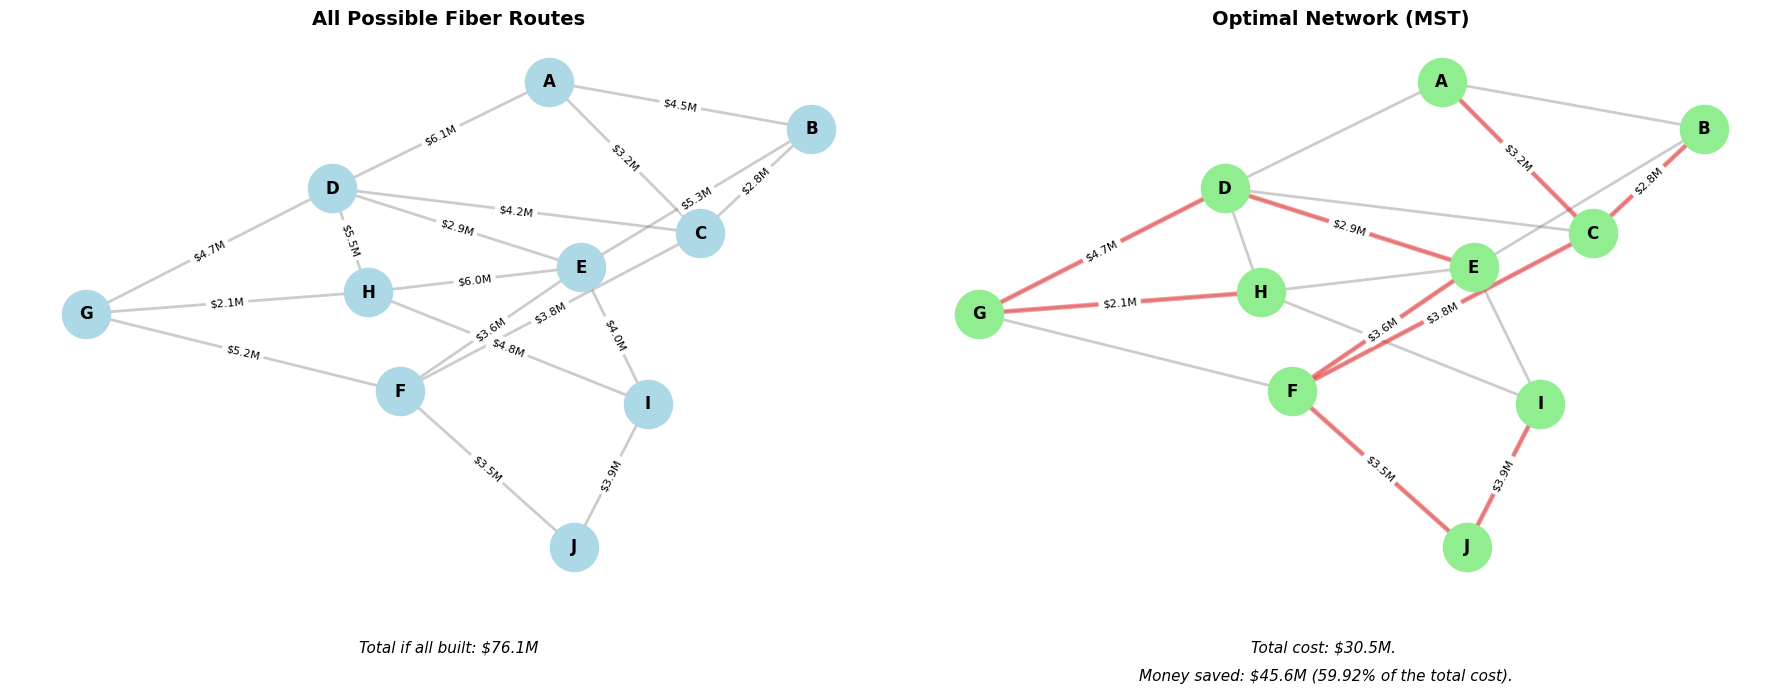

In [12]:
def visualize_isp_network(graph: WeightedGraph, mst_edges: List[Tuple]):
    """Visualize the ISP network."""
    
    # Create NetworkX graph
    G = nx.Graph()
    all_edges = graph.get_all_edges()
    for u, v, weight in all_edges:
        G.add_edge(u, v, weight=weight)
    
    mst_set = {tuple(sorted([u, v])) for u, v, _ in mst_edges}
    pos = nx.spring_layout(G, seed=3, k=1.5, iterations=50)
    print(mst_set)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Left plot: All connections
    ax1.set_title('All Possible Fiber Routes', fontsize=14, fontweight='bold')
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1200, ax=ax1)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', ax=ax1)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.4, edge_color='gray', ax=ax1)
    edge_labels = {(u, v): f'${w}M' for u, v, w in all_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, ax=ax1)
    ax1.text(0.5, -0.1, f'Total if all built: ${sum(w for _, _, w in all_edges):.1f}M',
             transform=ax1.transAxes, ha='center', fontsize=11, style='italic')
    ax1.axis('off')




    ax2.set_title('Optimal Network (MST)', fontsize=14, fontweight='bold')
    nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=1200, ax=ax2)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', ax=ax2)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.4, edge_color='gray', ax=ax2)
    nx.draw_networkx_edges(G, pos, edgelist=mst_set, width=3.5, alpha=0.4, edge_color="red", ax=ax2)
    edge_labels_mst = {(u, v): f'${w}M' for u, v, w in mst_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels_mst, font_size=8, ax=ax2)
    ax2.text(1.5, -0.1, f'Total cost: ${total_cost}M. ', transform=ax1.transAxes, ha ='center', fontsize=11, style='italic')
    ax2.text(1.5, -0.15, f'Money saved: ${savings:.1f}M ({savings_percent:.2f}% of the total cost).', transform=ax1.transAxes, ha ='center', fontsize=11, style='italic')
    ax2.axis('off')

   
    # Add your visualization code here
    
    plt.tight_layout()
    plt.show()

# Create visualization
visualize_isp_network(isp_network, mst_cables)